# Chapter06-01 차원 축소(Dimension Reduction) 개요

#### 차원이 증가할수록...
- 데이터 포인트 간의 거리가 기하급수적으로 멀어져 희소(sparse)한 구조를 가지게 됨
- 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐
- 피처가 많을 경우 개별 피처 간 상관관계가 높을 가능성 큼 -> 선형 모델에서는 다중 공선성 문제 생길 수 있음

#### 다차원의 피처를 차원 축소해 피처 수를 줄이면...
- 더 직관적으로 데이터 해석 가능
- 학습 데이터 크기 줄어들어 학습에 필요한 처리능력 줄일 수 있음

#### 피처 선택: 특성 피처에 종속성이 강한 불필요한 피처는 아예 제거, 데이터의 특징을 잘 나타내는 주요 피처만 선택

#### 피처 추출: 기존 피처를 저차원의 중요 피처로 압축해서 추출

차원 축소는 단순히 데이터의 압축을 의미하는 것이 아님. <span style="color:red">차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출</span>. PCA, SVD, NMF 등의 알고리즘이 있음. 이미지나 텍스트에서 잠재적인 의미를 찾아 주는 데 이 알고리즘이 잘 활용되고 있다.
- 이미지 데이터: 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축 수행 가능. 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이기 때문에 이미지 분류 등의 분류 수행 시에 과적합(overfitting) 영향력이 작아져 예측 성능을 끌어올릴 수 있음.
- 텍스트 문서: 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하고 찾아낼수 있음.

# Chapter06-02 PCA(Principal Component Analysis)
## PCA 개요
PCA, 즉 주성분 분석은 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법임.

#### 선형 대수의 관점
입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것임. 이 고유 벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄. 고윳값(Eigenvalue)은 바로 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타냄.

- 선형 변환: 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것. -> 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념.

||X|Y|Z|
|-|-|-|-|
|X|3.0|-0.71|-0.24|
|Y|-0.71|4.5|0.28|
|Z|-0.24|0.28|0.91|

위 표는 공분산 행렬임. 대각선 원소는 각 변수의 분산, 대각선 이외 원소는 변수 쌍 간의 공분산 의미.
- 고유 벡터: 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭
- 대칭 행렬은 항상 고유벡터를 직교행렬(orthogonal matrix)로, 고유값을 정방 행렬로 대각화할 수 있음.

$C=P\sum{P^T}$

$C = \begin{bmatrix}e_1&...&e_n\end{bmatrix} \begin{bmatrix}\lambda_1&...&0\\...&...&...\\0&...&\lambda_n\end{bmatrix} \begin{bmatrix}e_1^t\\...\\e_n^t\end{bmatrix}$

공분산 C는 고유벡터 직교행렬 * 고유값 정방 행렬 * 고유벡터 직교행렬의 전치행렬로 분해됨. $e_i$는 i번째 고유벡터를, $\lambda_i$는 i번째 고유벡터의 크기를 의미함. $e_1$은 가장 분산이 큰 방향을 가진 고유벡터이고, $e_2$는 $e_1$에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터임.

<span style="color:blue"> 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA이다</span>
1. 입력 데이터 세트의 공분산 행렬을 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 반환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


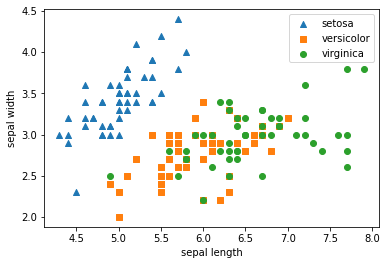

In [4]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [7]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


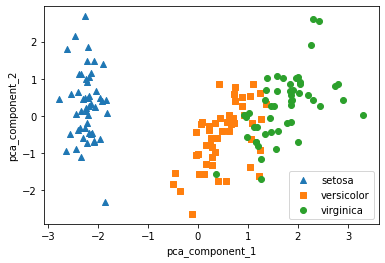

In [10]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# pca_component_1을 x축, pc_component_2를 y축으로 scatter plt 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [12]:
# 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 확인

print(pca.explained_variance_ratio_)
# 둘을 합치면, 변환 후에도 원본 데이터의 변동성을 95% 설명 가능하다는 이야기.

[0.72962445 0.22850762]


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [14]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


#### 좀 더 많은 피처를 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변환한 뒤, 예측 영향도가 어떻게 되는지 비교해보자.

In [17]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [18]:
df.rename(columns={'PAY_0':'PAY_!', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

<AxesSubplot:>

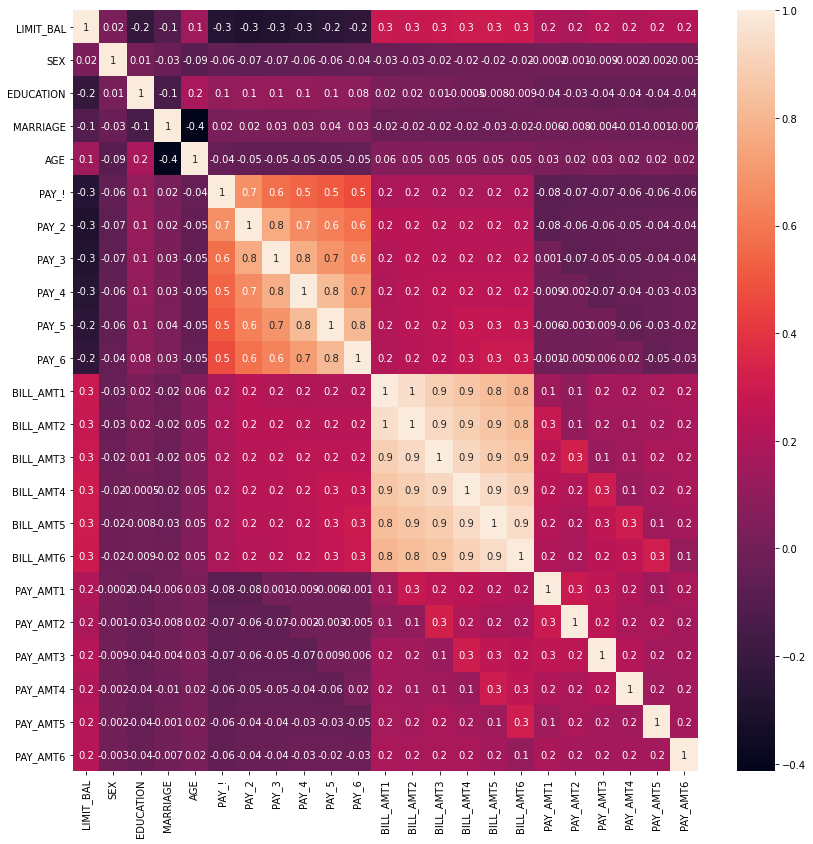

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [22]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7919 0.798  0.8017]
PCA 변환 데이터 세트 평균 정확도:0.7972


#### PCA는 컴퓨터 비전(Computer Vision) 분야에 활발하게 적용됨. 특히 얼굴 인식의 경우 Eigen-face라고 불리는 PCA 변환으로 원본 얼굴 이미지를 변환해 사용하는 경우가 많다.